In [1]:
import torch
import torchvision

# Loading MNIST data

In [5]:
#define hyperparameters for model training
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 100
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [7]:
#load MNIST data
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./files/', train=True, download=True, transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(
            (0.1307,), (0.3081,)
        )
    ])),
    batch_size=batch_size_train, shuffle=True)



In [9]:
test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./files/', train=False, download=True,
                               transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor(),
                                   torchvision.transforms.Normalize(
                                       (0.1307,), (0.3081,))
                               ])), batch_size=batch_size_test, shuffle=True)

In [13]:
#Looking at hadwritten examples
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [14]:
#shape of one batch size
example_data.shape

torch.Size([1000, 1, 28, 28])

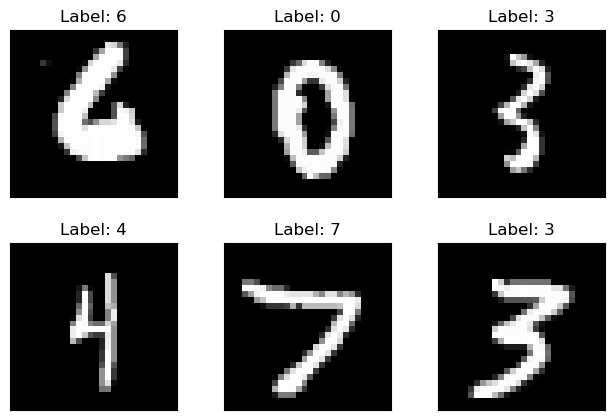

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title('Label: {}'.format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

# Building the CNN